- Nama  = Huffaz Muhammad Abdurrofi Baith
- NIM   = 1306620075
- Kelas = Fisika B
- Mata Kuliah = Pengolahan Citra Digital 

### Tugas
1. Carilah suatu gambar (browsing)
2. Lakukan transformasi FFT
3. Plot FFT spectrum dan phase spectrum
4. Transormasi balik FFT
5. Buat threshold divariasikan, terus ditransformasi balik

### Import Modul

In [1]:
%matplotlib inline
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
from scipy import stats
from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft
import timeit
from scipy import fftpack

### Membuka gambar

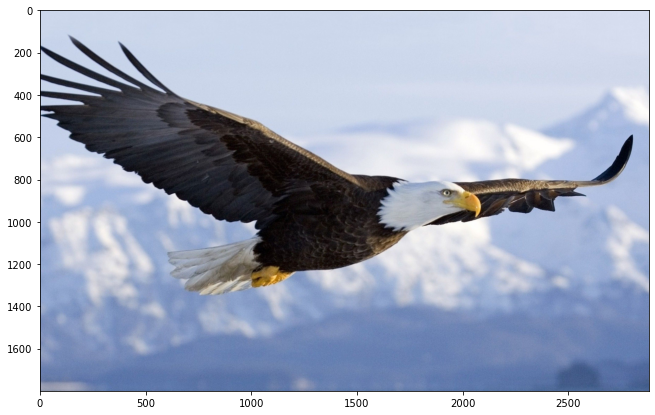

In [2]:
image = Image.open('eagle.jpg')
pylab.figure(figsize=(15,7))
pylab.imshow(image)

In [3]:
image_rgb2gray = image.convert('L')
image_nparray_gray = np.array(image_rgb2gray)
image_nparray_color = np.array(image)

### Plot FFT specrum dan phase FFT beserta rekonstruksi gambar

In [4]:
#fft spectrum magnitude
fft_freq = fp.fft2(image_nparray_gray)
im_fft_freq = fp.fftshift(fft_freq)
log_freq = np.log(np.abs(im_fft_freq))
#FFT Phase
phase_fft = np.angle(im_fft_freq)
#Reconstructed
image_recon = fp.ifft2(fft_freq).real
recon = np.clip(image_recon,0,255)

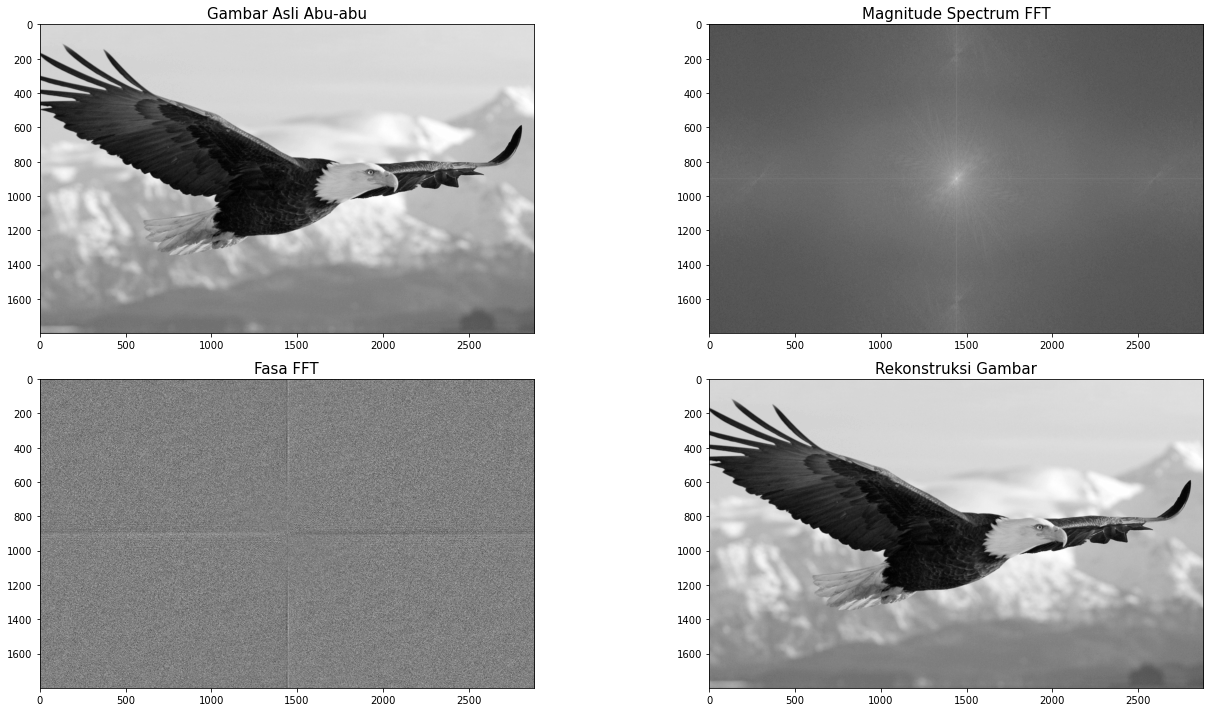

In [5]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.imshow(image_nparray_gray, cmap=plt.cm.gray)
plt.title('Gambar Asli Abu-abu', size = 15)
plt.subplot(222)
plt.imshow(log_freq, cmap=plt.cm.gray)
plt.title('Magnitude Spectrum FFT', size = 15)
plt.subplot(223)
plt.imshow(phase_fft, cmap=plt.cm.gray)
plt.title('Fasa FFT', size = 15)
plt.subplot(224)
plt.imshow(recon, cmap=plt.cm.gray)
plt.title('Rekonstruksi Gambar', size = 15)
plt.tight_layout(w_pad=0.0005)
plt.show()

### Threshold Variasi 

In [6]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

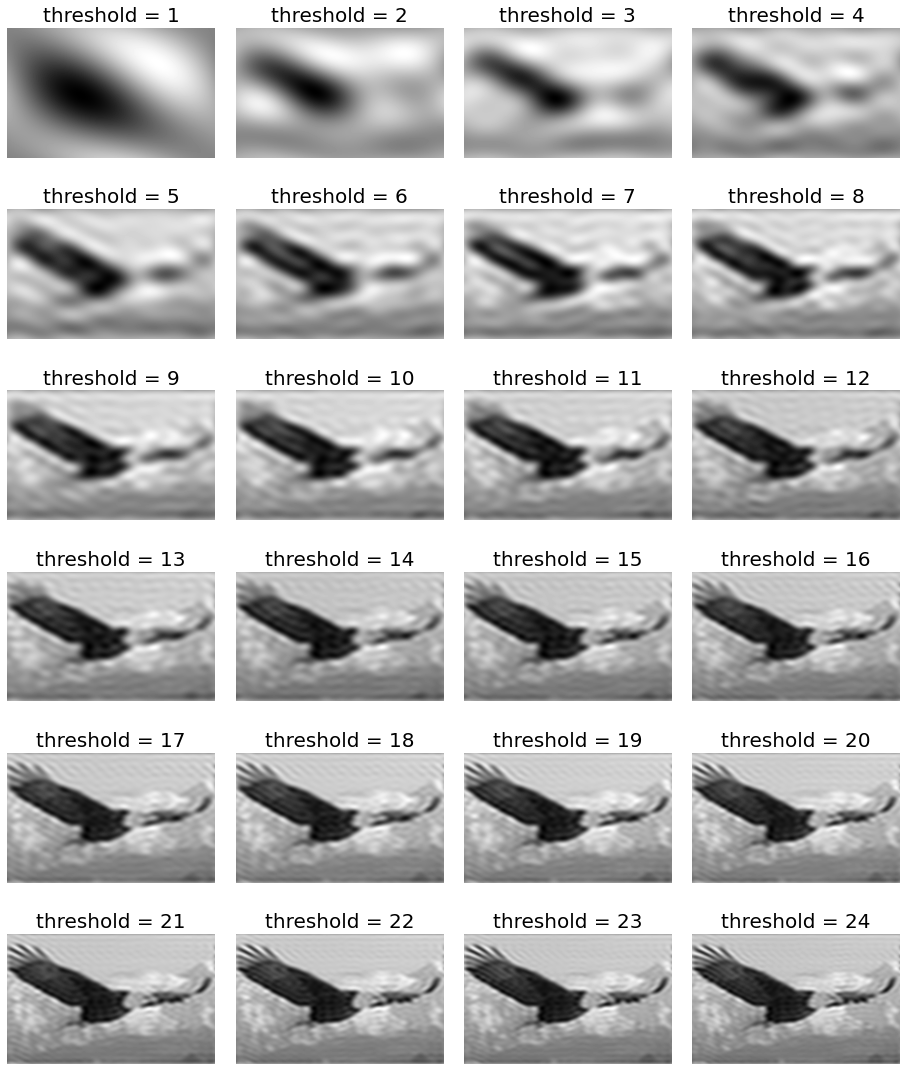

In [7]:
freq = fp.fft2(image_rgb2gray)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
snrs_lp = []
thresh = list(range(1,25))
pylab.figure(figsize=(16,20))
for i in thresh:
    freq1 = np.copy(freq)
    freq2 = fp.fftshift(freq1)
    freq2_low = np.copy(freq2)
    freq2_low[half_w-i:half_w+i+1,half_h-i:half_h+i+1] = 0
    freq2 -= freq2_low # select only the first 20x20 (low) frequencies
    im1 = fp.ifft2(fp.ifftshift(freq2)).real
    snrs_lp.append(signaltonoise(im1, axis=None))
    pylab.subplot(6,4,i), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
    pylab.title('threshold = ' + str(i), size=20)
pylab.subplots_adjust(wspace=0.1, hspace=0)
pylab.show()

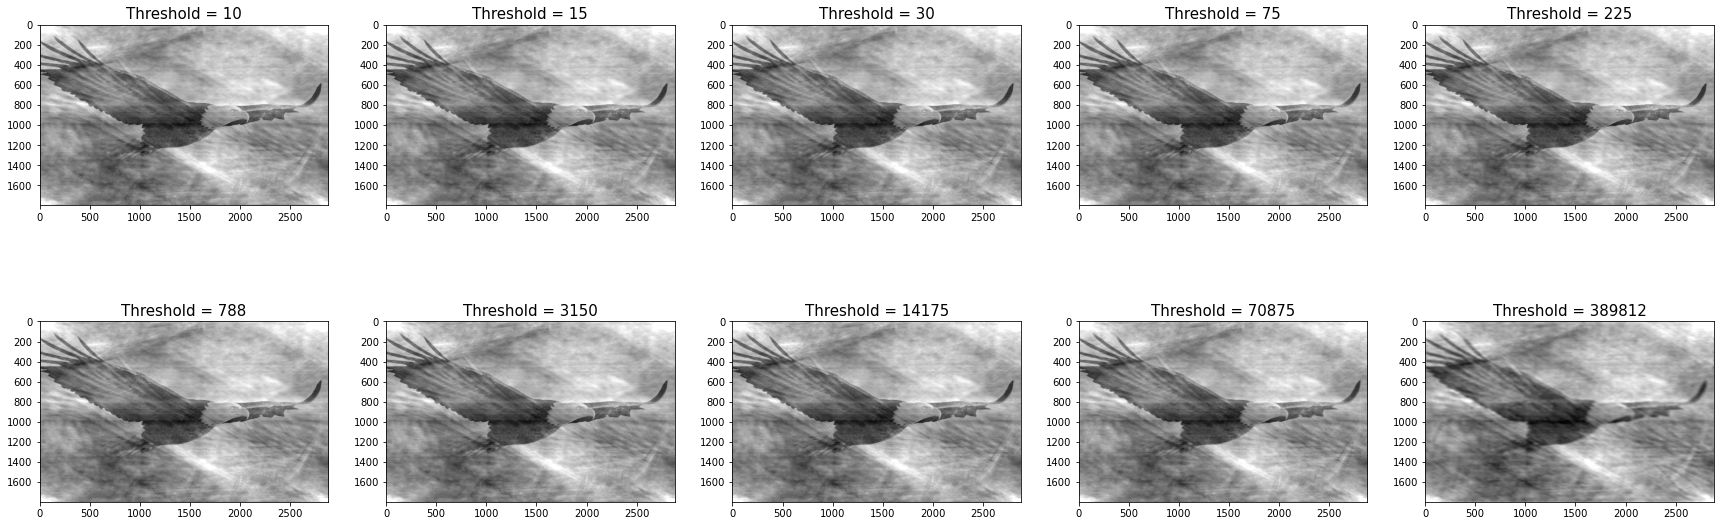

In [8]:
def thresh_array(freq1,threshold):
    matr = freq1.copy()
    for y in range(len(matr)):
        for x in range(len(matr[y])):
            if matr[y][x] < threshold:
                matr[y][x] = 0
    return matr

threshold = 10
pylab.figure(figsize=(30,10))
kons_thresh = 1
for i in range(1,11):
    fft_threshold_copy = freq1.copy()
    fft_thresholding = thresh_array(fft_threshold_copy,threshold)
    ifft = fp.ifft2(fft_thresholding).real
    image = np.clip(ifft,0,255)
    pylab.subplot(2,5,i)
    pylab.imshow(image, cmap=pylab.cm.gray)
    pylab.title('Threshold = '+str(round(threshold)), size = 15)
    kons_thresh += 1/2
    threshold *= kons_thresh

### THRESHOLDING dengan fourier_gaussian

In [9]:
def fourier_gaus(sigma):
    fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20,10))
    pylab.gray() # show the result in grayscale
    im = np.mean(imread('eagle.jpg'), axis=2)
    freq = fp.fft2(im)
    freq_gaussian = ndimage.fourier_gaussian(freq, sigma)
    im1 = fp.ifft2(freq_gaussian)
    axes1.imshow(im), axes1.axis('off'), axes2.imshow(im1.real) # the imaginarypart is an artifact
    axes2.axis('off')
    pylab.show()

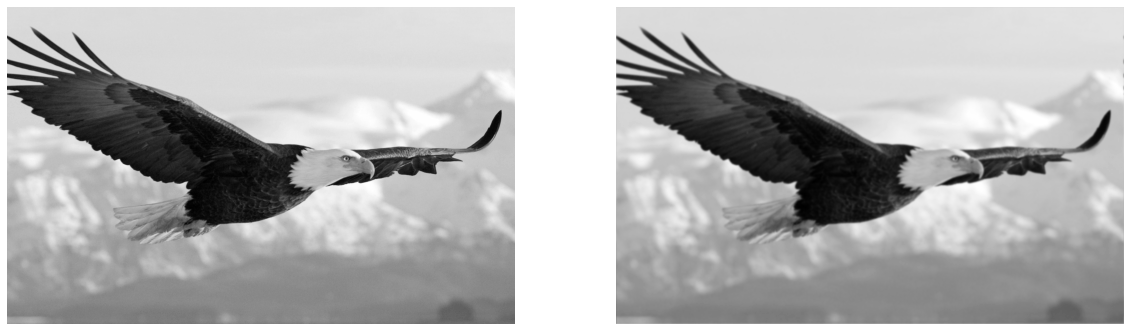

In [10]:
fourier_gaus(sigma = 4)

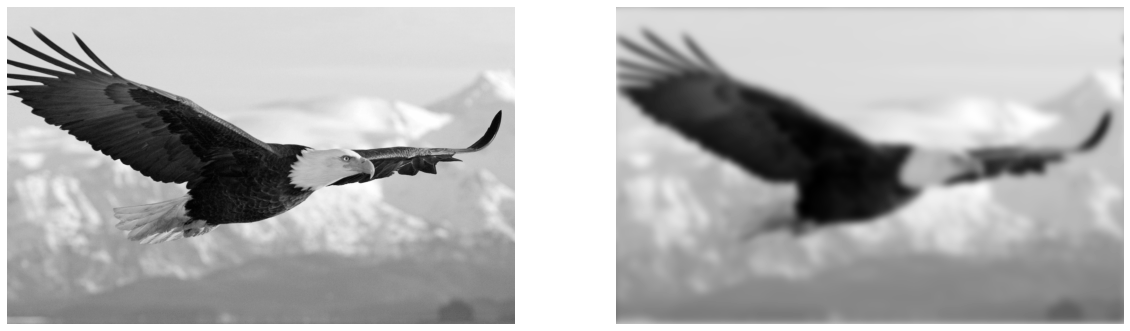

In [11]:
fourier_gaus(sigma = 20)

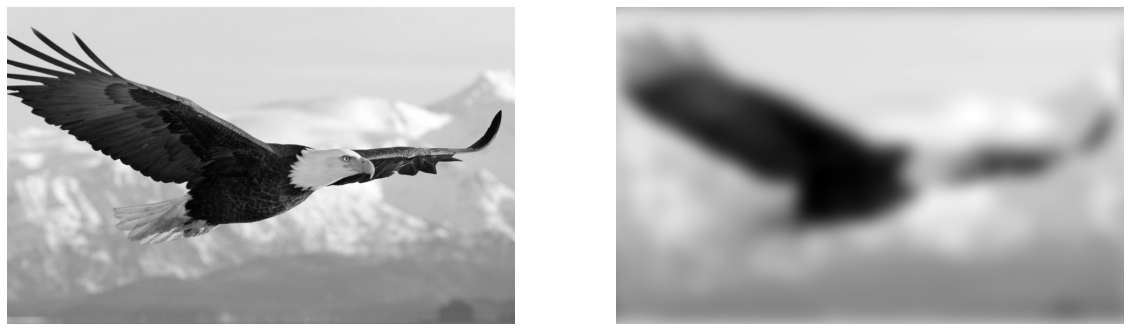

In [12]:
fourier_gaus(sigma = 50)